
# 项目：未前往就诊的挂号预约数据集探索

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 本数据集包含10万条巴西预约挂号的求诊信息，研究病人是否如约前往医院就诊。每行数据录入了有关患者特点的多个数值，包括 “预约日期 (ScheduledDay)”指患者具体预约就诊的日期；“街区 (Neighborhood) ”指医院所在位置；“福利保障 (Scholarship)”说明病人是否是巴西福利项目 Bolsa Família 的保障人群；最后一列内容的编码：“No”表示病人已如约就诊，“Yes”说明病人未前往就诊。

> 接下来将从有哪些重要因素能够帮助我们预测患者是否会按照其挂号预约前往医院就诊的角度进行数据集探索。对年龄、性别、是否有福利保障是否影响如约就诊进行分析。


In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline



<a id='wrangling'></a>
## 数据整理



### 常规属性

In [2]:
# 加载数据并打印几行，检查数据
df=pd.read_csv('nsa.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


对数据集进行一些基本信息查询后，可以知道，数据集有110527行，14列，没有缺失值；PatientId和AppointmentID数据类型不正确，应该为object;ScheduledDay和AppointmentDay数据类型不正确，应该为datetime类型；其余数据类型不影响数据集后续使用。同时可以年龄数据有一些问题，最小年龄小于0。所以需要转换PatientId、AppointmentID、ScheduledDay和AppointmentDay的数据类型，将年龄小于0的数据去除。



### 数据清理

In [7]:
# 将Patients和AppointmentID转换为object类型
df['PatientId']=df['PatientId'].astype('int').astype('object')
df['AppointmentID']=df['AppointmentID'].astype('object')


In [8]:
#转换ScheduledDay和AppointmentDay数据为日期格式
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])


In [9]:
#去除年龄小于0的数据
df.drop(df[df['Age']<0].index,inplace=True)
df.shape

(110526, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null object
AppointmentID     110526 non-null object
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 12.6+ MB


更改了PatientId、AppointmentID、ScheduledDay和AppointmentDay的数据类型，去除年龄小于0的数据，数据清理完成。

<a id='eda'></a>
## 探索性数据分析

In [11]:
#如约与失约病人的比例
df_p=df['No-show'].value_counts()/df['No-show'].count()
df_p

No     0.798066
Yes    0.201934
Name: No-show, dtype: float64

Text(0.5,1,'percentage of No-show')

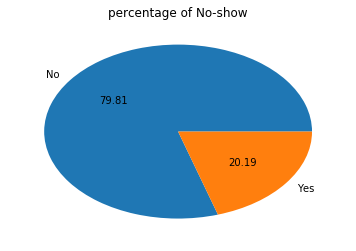

In [12]:
plt.pie(x=df_p, labels=df_p.index,autopct='%.2f')
plt.title('percentage of No-show')

从如约与失约人数占总人数比例可以看到，如约人数远超失约人数。探索哪些因素影响赴约情况应以比例进行比较。

### 研究问题 1：是否如约与性别的关系

In [14]:
# 计算不同性别是否如约的人数
class_show_gender=df.groupby(['Gender','No-show']).Gender.count()
class_show_gender

Gender  No-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: Gender, dtype: int64

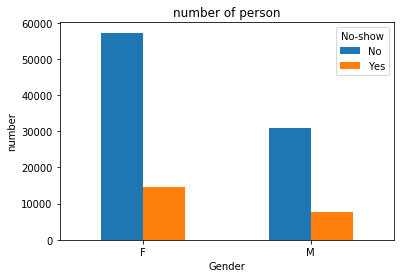

In [18]:
#可视化
class_show_gender.unstack().plot(kind='bar',rot=0,title='number of person')
plt.ylabel('number');

In [19]:
# 计算不同性别是否如约的比例
class_gender=df.groupby(['Gender']).Gender.count()
class_M=class_show_gender['M']/class_gender['M']
class_F=class_show_gender['F']/class_gender['F']
print(class_M,class_F)

No-show
No     0.800321
Yes    0.199679
Name: Gender, dtype: float64 No-show
No     0.796851
Yes    0.203149
Name: Gender, dtype: float64


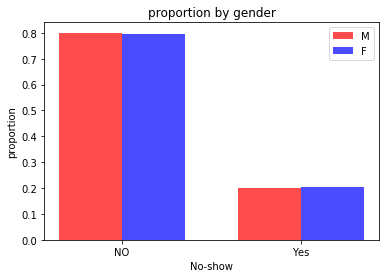

In [20]:
#可视化
ind=np.arange(len(class_M))
width=0.35
red_bars=plt.bar(ind,class_M,width,color='r',alpha=0.7,label='M')
blue_bars=plt.bar(ind+width,class_F,width,color='blue',alpha=.7,label='F')
plt.ylabel('proportion')
plt.xlabel('No-show')
plt.title('proportion by gender')
locations=ind+width/2
labels=['NO','Yes']
plt.xticks(locations,labels)
plt.legend();


从是不同性别是否如约的的比例可以看出：不论男女，如约的比例均大于失约的比例；同时男性如约的比例大于女性。所以病人预约后是否如约与性别有关，若性别为男，有更大的几率如约。

### 研究问题2：是否如约与年龄的关系

In [21]:
# 将年龄分组统计
edges = [ 0,20 ,60 ,115 ] 
names = [ 'young','middle','old'  ] 
df['age_levels'] = pd.cut(df['Age'],edges,labels=names)
class_show_age=df.groupby(['age_levels','No-show'])['No-show'].count()
class_show_age

age_levels  No-show
young       No         21852
            Yes         6457
middle      No         46699
            Yes        12217
old         No         16756
            Yes         3006
Name: No-show, dtype: int64

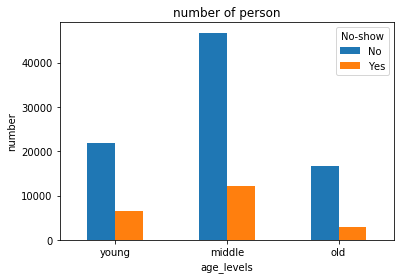

In [22]:
#可视化
class_show_age.unstack().plot(kind='bar',rot=0,title='number of person')
plt.ylabel('number');

In [24]:
#计算不同年龄段失约、如约的比例
class_show=df.groupby('age_levels').age_levels.count()
class_young=class_show_age['young']/class_show['young']
class_middle=class_show_age['middle']/class_show['middle']
class_old=class_show_age['old']/class_show['old']
print(class_young,class_middle,class_old)

No-show
No     0.77191
Yes    0.22809
Name: No-show, dtype: float64 No-show
No     0.792637
Yes    0.207363
Name: No-show, dtype: float64 No-show
No     0.84789
Yes    0.15211
Name: No-show, dtype: float64


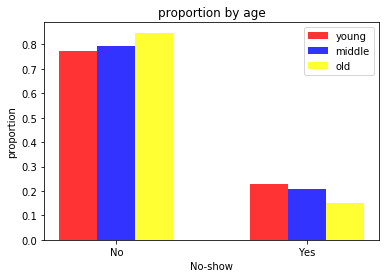

In [25]:
#分组作图
ind=np.arange(len(class_young))
width=0.2
red_bars=plt.bar(ind,class_young,width,color='r',alpha=.8,label='young')
blue_bars=plt.bar(ind+width,class_middle,width,color='blue',alpha=.8,label='middle')
yellow_bars=plt.bar(ind+2*width,class_old,width,color='yellow',alpha=.8,label='old')
plt.ylabel('proportion')
plt.xlabel('No-show')
plt.title('proportion by age')
locations=ind+width
labels=['No','Yes']
plt.xticks(locations,labels)
plt.legend();


从是不同年龄是否如约的的比例可以看出：随着年龄的上升(young：0-20，middle：20-60，old：60-115)，病人准时赴约的比例上升。所以病人预约后是否如约与年龄有关，年龄越大，如约几率越大。

### 研究问题 3：失约是否与福利保障有关


In [26]:
#计算是否有福利保障在如约与失约的人数
class_sch_s=df.groupby(['No-show','Scholarship']).Scholarship.count()
class_sch_s

No-show  Scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
Name: Scholarship, dtype: int64

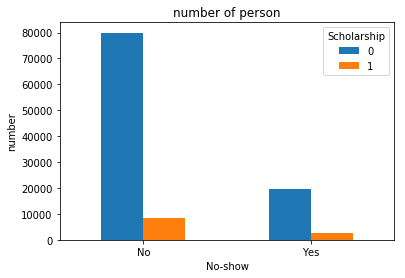

In [27]:
#可视化
class_sch_s.unstack().plot(kind='bar',rot=0,title='number of person')
plt.ylabel('number');

In [28]:
#计算是否有福利保障在如约与失约的比例
class_sch=df.groupby('Scholarship').Scholarship.count()
class_sch_ny=class_sch_s/class_sch
print(class_sch_ny)

No-show  Scholarship
No       0              0.801926
         1              0.762637
Yes      0              0.198074
         1              0.237363
Name: Scholarship, dtype: float64


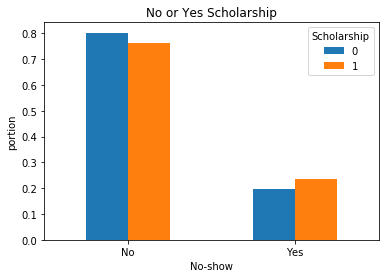

In [29]:
#更换标签，作图
class_sch_ny.unstack().plot(kind='bar',rot=0,title='No or Yes Scholarship')
plt.ylabel('portion')
plt.xlabel('No-show');

从不同福利保障人群如约与失约的比例可以看出：没有福利保障的如约比例比有福利保障的更高。所以是否有福利保障会影响病人是否如约就诊，没有福利保障的人更倾向于如约就诊。

<a id='conclusions'></a>
## 结论

> 通过数据清理，将PatientId、AppointmentID转换为float类型，将ScheduledDay和AppointmentDay转换为日期类型以便进行与之相关的分析。因为人的年龄不能小于0，所以去除年龄小于0的错误数据，提高数据的准确性。其余因素保持现有类型不会对数据分析造成不良影响，故不作改变。数据清理后，整个数据集仍有超过11万条记录，如约比列为0.7981，失约比例为0.2019，样本量足够大。对年龄、性别、是否有福利保障三个因素进行分,各种因素组合样本至少有数千份，是可以从中得出有效结论的，得出结论如下：

> 1、通过分析不同性别是否如约的比例，发现男性如约的比例高于女性如约的比例，所以是否失约与性别有关

> 2、通过分析不同年龄段失约、如约的比例，发现年龄越大，如约的比例越大，所以是否失约与年龄有关

> 3、通过分析有无福利保障人的如约与失约比例，发现没有福利保障如约的比例更高，所以是否失约与福利保障有关

> 其余因素如'Neighbourhood','Hipertension','Diabetes'等，由于未进行分析，故尚不能下结论。

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255